In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

In [2]:
# load data
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

print(train_df.shape)
print(test_df.shape)

(913000, 4)
(45000, 4)


In [3]:
train_df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [4]:
test_df.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
all_df = pd.concat([train_df, test_df])
print(all_df.shape)

(958000, 5)


In [6]:
all_df.head()

,date,id,item,sales,store
0,2013-01-01,NaN,1,13.0,1
1,2013-01-02,NaN,1,11.0,1
2,2013-01-03,NaN,1,14.0,1
3,2013-01-04,NaN,1,13.0,1
4,2013-01-05,NaN,1,10.0,1


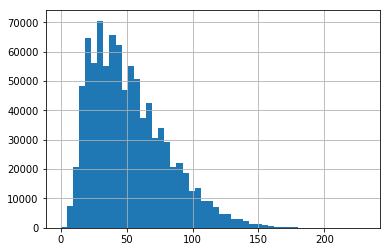

In [7]:
train_df['sales'].hist(bins=50)

# feat eng

In [8]:
all_df['date'] = pd.to_datetime(all_df['date'])

In [9]:
all_df['weekday'] = all_df['date'].dt.weekday

In [10]:
all_df['day'] = all_df['date'].dt.day
all_df['year'] = all_df['date'].dt.year
all_df['month'] = all_df['date'].dt.month

# numeric_features

In [11]:
all_df.columns

Index(['date', 'id', 'item', 'sales', 'store', 'weekday', 'day', 'year',
       'month'],
      dtype='object')

In [12]:
all_df.columns[[not np.issubdtype(dt, np.number) for dt in all_df.dtypes]]

Index(['date'], dtype='object')

In [13]:
numeric_features = all_df.columns[[np.issubdtype(dt, np.number) for dt in all_df.dtypes]]
numeric_features = numeric_features.drop([
    'id', 'sales'
])

In [14]:
numeric_features

Index(['item', 'store', 'weekday', 'day', 'year', 'month'], dtype='object')

In [15]:
cat_features = []
cat_features.append(np.where(numeric_features.values == 'item')[0][0])
cat_features.append(np.where(numeric_features.values == 'store')[0][0])
cat_features

[0, 1]

# Create Validation Dataset

In [16]:
train_df = all_df[:913000]
test_df = all_df[913000:]

train_f_df = train_df[numeric_features]
test_f_df = test_df[numeric_features]

print(train_df.shape)
print(test_df.shape)

(913000, 9)
(45000, 9)


In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

train_X, valid_X, train_y, valid_y = train_test_split(train_f_df.as_matrix(), 
                                                      train_df['sales'].as_matrix(),
                                                      test_size=0.20,
                                                      random_state=42)

print(type(train_X))
print(type(valid_X))

print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

Using TensorFlow backend.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(730400, 6)
(182600, 6)
(730400,)
(182600,)


# Train

In [18]:
import lightgbm as lgb

In [19]:
lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(valid_X, valid_y, reference=lgb_train)

In [20]:
# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'mape'},
        'learning_rate': 0.03,
        'num_leaves': 512,
        'num_iteration': 2000,
        'verbose': 0
}

In [21]:
gbm = lgb.train(params,
            lgb_train,
            valid_sets=lgb_eval,
            early_stopping_rounds=30)

/home/ckobayashi/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's mape: 0.661584
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's mape: 0.645727
[3]	valid_0's mape: 0.630428
[4]	valid_0's mape: 0.615662
[5]	valid_0's mape: 0.60143
[6]	valid_0's mape: 0.587953
[7]	valid_0's mape: 0.57486
[8]	valid_0's mape: 0.562376
[9]	valid_0's mape: 0.550832
[10]	valid_0's mape: 0.539378
[11]	valid_0's mape: 0.528689
[12]	valid_0's mape: 0.518597
[13]	valid_0's mape: 0.508511
[14]	valid_0's mape: 0.499039
[15]	valid_0's mape: 0.489805
[16]	valid_0's mape: 0.481383
[17]	valid_0's mape: 0.472952
[18]	valid_0's mape: 0.464785
[19]	valid_0's mape: 0.455849
[20]	valid_0's mape: 0.448714
[21]	valid_0's mape: 0.439776
[22]	valid_0's mape: 0.431751
[23]	valid_0's mape: 0.424835
[24]	valid_0's mape: 0.416684
[25]	valid_0's mape: 0.410084
[26]	valid_0's mape: 0.403868
[27]	valid_0's mape: 0.396536
[28]	valid_0's mape: 0.390715
[29]	valid_0's mape: 0.383869
[30]	valid_0's mape: 0.377956
[31]	valid_0's mape: 0.370783
[32]	valid_0's mape

[269]	valid_0's mape: 0.133472
[270]	valid_0's mape: 0.133464
[271]	valid_0's mape: 0.133457
[272]	valid_0's mape: 0.133422
[273]	valid_0's mape: 0.133398
[274]	valid_0's mape: 0.13339
[275]	valid_0's mape: 0.133383
[276]	valid_0's mape: 0.133374
[277]	valid_0's mape: 0.133366
[278]	valid_0's mape: 0.133358
[279]	valid_0's mape: 0.133321
[280]	valid_0's mape: 0.133315
[281]	valid_0's mape: 0.133302
[282]	valid_0's mape: 0.133282
[283]	valid_0's mape: 0.133276
[284]	valid_0's mape: 0.133257
[285]	valid_0's mape: 0.133249
[286]	valid_0's mape: 0.133243
[287]	valid_0's mape: 0.13321
[288]	valid_0's mape: 0.133195
[289]	valid_0's mape: 0.13319
[290]	valid_0's mape: 0.133185
[291]	valid_0's mape: 0.133168
[292]	valid_0's mape: 0.133162
[293]	valid_0's mape: 0.133156
[294]	valid_0's mape: 0.133143
[295]	valid_0's mape: 0.133129
[296]	valid_0's mape: 0.133114
[297]	valid_0's mape: 0.133109
[298]	valid_0's mape: 0.133096
[299]	valid_0's mape: 0.133079
[300]	valid_0's mape: 0.133053
[301]	valid

[536]	valid_0's mape: 0.132441
[537]	valid_0's mape: 0.132441
[538]	valid_0's mape: 0.132442
[539]	valid_0's mape: 0.132441
[540]	valid_0's mape: 0.132441
[541]	valid_0's mape: 0.132441
[542]	valid_0's mape: 0.132442
[543]	valid_0's mape: 0.132441
[544]	valid_0's mape: 0.132441
[545]	valid_0's mape: 0.132443
[546]	valid_0's mape: 0.132437
[547]	valid_0's mape: 0.132436
[548]	valid_0's mape: 0.132436
[549]	valid_0's mape: 0.132437
[550]	valid_0's mape: 0.132438
[551]	valid_0's mape: 0.132439
[552]	valid_0's mape: 0.132439
[553]	valid_0's mape: 0.132435
[554]	valid_0's mape: 0.132435
[555]	valid_0's mape: 0.132436
[556]	valid_0's mape: 0.132436
[557]	valid_0's mape: 0.132434
[558]	valid_0's mape: 0.132435
[559]	valid_0's mape: 0.132433
[560]	valid_0's mape: 0.132433
[561]	valid_0's mape: 0.132433
[562]	valid_0's mape: 0.132433
[563]	valid_0's mape: 0.132433
[564]	valid_0's mape: 0.132433
[565]	valid_0's mape: 0.132431
[566]	valid_0's mape: 0.132431
[567]	valid_0's mape: 0.13243
[568]	val

In [22]:
y_predict = gbm.predict(valid_X, num_iteration=gbm.best_iteration)

In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
from sklearn.metrics import mean_squared_error as mean_squared_error

In [25]:
print(mean_absolute_percentage_error(valid_y, y_predict))

# 13.2430389186

13.2430389186


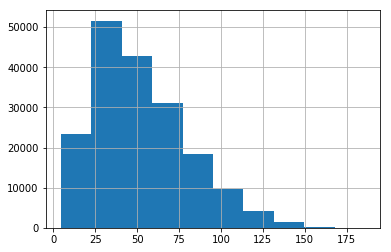

In [26]:
pd.Series(y_predict.flatten()).hist()

# Importance

# Criar CSV para submissão

In [27]:
y_predict = gbm.predict(test_f_df.as_matrix(), num_iteration=gbm.best_iteration)

In [28]:
sample_submission_df = pd.DataFrame()

sample_submission_df['id'] = test_df['id'].astype(int)
sample_submission_df['sales'] = y_predict
sample_submission_df.head()

,id,sales
0,0,12.350178
1,1,13.885272
2,2,14.131689
3,3,14.991447
4,4,16.254223


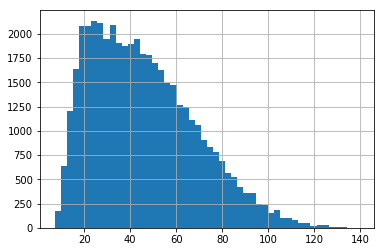

In [29]:
sample_submission_df['sales'].hist(bins = 50)

In [30]:
sample_submission_df.to_csv('submission.csv', index=False)